In [2]:
import waveracepy.leaderboards as leaderboards
import waveracepy.rankings as rankings
import waveracepy.tallysheet as tallysheet
import waveracepy.awards as awards
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scoring System

The scoring system utilizes data pulled from the speedrun.com API. This is an attempt at providing a consistent metric for evaluating player performance, tracking progress, and generating community rankings. To ensure the integrity of the system, only verified NTSC runs with video proof are included in the scoring. PAL scores can also be generated as a separate product if desired. A player's total score is the sum of 5 separate scoring categories, scaled to a maximum possible score of 100. While this system would ideally be completely objective, there is some inherent subjectivity with the choice of scoring algorithms and their respective weight within the total score.  However, the algorithms and weights can easily be changed in the future based on community feedback.  In addition, the scores are relative to specific submitted times (1st place, 3rd place, 4th place, and last place) and when these times change the raw scores can also change.

### Definitions

| Term                 | Definition |
| -------------------- | ---------- |
| IL                   | Individual Level (time trial, in-game timer)
| RTA                  | Real Time Attack (championship mode, external timer)
| $i$                  | Represents a given course (level, category).
| $\text{t}_i$         | A player's best submitted time for course $i$.
| $\text{slowest}_i$   | The slowest submitted time for course $i$.
| $\text{1st place}_i$ | The world record time for course $i$.
| $\text{3rd place}_i$ | The third place time for course $i$.
| $\text{4th place}_i$ | The fourth place time for course $i$.
| $\text{benchmark}_i$ | For a given third place time, x'yy"zzz: <br> $\text{3 Lap, Reverse} \rightarrow \text{x'yy"999}$ <br> $\text{1 Lap} \rightarrow \begin{cases} \text{x'yy"500} & \text{if zzz}~~ < \text{500}\\ \text{x'yy"999} & \text{if zzz}~~ \geq \text{499} \end{cases}$
| $\text{standard}_i$  | Benchmark time plus: <br> $\begin{cases} 1~~ \text{sec} & \text{for 3 Lap, Reverse}\\ 0.5~~ \text{sec} & \text{for 1 Lap} \end{cases}$

### Scoring Algorithms
| Score | Type    | Maximum <br> Points | Algorithm |
| ---------------- | :-----: | :----: | ----------- |
| Base             | IL      | 24     | $\sum_{i = 1}^{24} \begin{cases} 0 & \text{if}~~ \nexists~~ \text{t}_i\\ 1 & \text{if}~~ \text{t}_i \leq \text{standard}_i\\ \frac{\text{slowest}_i - \text{t}_i}{\text{slowest}_i - \text{standard}_i} & \text{otherwise} \end{cases}$
| Standard         | IL      | 24     | $\sum_{i = 1}^{24} \begin{cases} 0 & \text{if}~~ \text{t}_i > \text{standard}_i\\ 1 & \text{if}~~ \text{t}_i \leq \text{benchmark}_i\\ \frac{\text{standard}_i - \text{t}_i}{\text{standard}_i - \text{benchmark}_i} & \text{otherwise} \end{cases}$
| Benchmark        | IL      | 24     | $\sum_{i = 1}^{24} \begin{cases} 0 & \text{if}~~ \text{t}_i > \text{benchmark}_i\\ 1 & \text{if}~~ \text{t}_i \leq \text{3rd place}_i\\ \frac{\text{benchmark}_i - \text{t}_i}{\text{benchmark}_i - \text{3rd place}_i} & \text{otherwise} \end{cases}$
| Championship     | RTA     | 8      | $\sum_{i = 1}^{5} \begin{cases} 0 & \text{if}~~ \nexists~~ \text{t}_i\\ 4\left(\frac{\text{slowest}_{i} - \text{t}_i}{\text{slowest}_{i} - \text{1st place}_i}\right) & \text{if}~~ i = \text{``All Championships''}\\ \frac{\text{slowest}_{i} - \text{t}_i}{\text{1st place}_{i} - \text{1st place}_i} & \text{otherwise} \end{cases}$
| Medal            | IL, RTA | 29     | $\sum_{i = 1}^{29} \begin{cases} 0 & \text{if}~~ \text{t}_i > \text{3rd place}_i\\ \frac{\text{4th place}_i - \text{t}_i}{\text{4th place}_i - \text{1st place}_i} & \text{otherwise} \end{cases}$
| Total            | IL, RTA | 100    | $\frac{100}{106} \sum_{k = 1}^{5} \text{score}_k$

# Rankings

Scores are calculated based on all verified runs with video proof and these scores are used to generate all-time rankings.  However, in order to qualify for the current rankings, a player must have submitted a PB within the past two years.  If a player qualifies, then they are included in the rankings!  Once these algorithms are polished, rankings could be published fairly regularly.  It takes less than 15 minutes to pull the data, run the scripts, and publish the outputs. 

### Tallysheet

In addition to the rankings, a tallysheet is produced documenting the number of standards, benchmarks, and medals each player has acquired.  Hopefully someday this can be used for official achievements.

### Comparison

To demonstrate how the scoring system and rankings work, let's compare it against the most recent official rankings (2021 Q4).  Here's the official top 10:

| Rank | Player |
| :--: | ------ |
| 1    | Shibbypod
| 2    | doctorfeesh
| 3    | Game
| 4    | MDK1
| 5    | MyOhMyPancakes
| 6    | MetalHead
| 7    | AS_Money
| 8    | Illudude
| 9    | meauxdal
| 10   | andypanther

In [8]:
R = rankings.calc(
    DATE = '2021-12-31',
    READ = True,
    PREV = True
)
R.head(10)

,CURRENT RANK,PREVIOUS RANK,ALLTIME RANK,TOTAL SCORE,dSCORE,BASE SCORE,STANDARD SCORE,BENCHMARK SCORE,CHAMPIONSHIP SCORE,MEDAL SCORE
PLAYER,,,,,,,,,,
Shibbypod,1.0,1.0,1.0,98.67,2.68,24.000000,24.000,24.000000,8.00,24.589010
doctorfeesh,2.0,2.0,2.0,90.93,2.33,24.000000,24.000,23.701641,7.46,17.232846
Game,3.0,3.0,3.0,63.42,-2.82,24.000000,22.653,16.993910,0.00,3.583871
MyOhMyPancakes,4.0,4.0,4.0,50.23,-1.21,23.846762,17.183,4.779652,6.98,0.455378
MDK1,5.0,11.0,5.0,50.15,23.06,18.792414,17.756,11.370144,1.90,3.344314
MetalHead,6.0,5.0,6.0,49.88,-0.55,23.585670,15.855,6.497861,6.77,0.157143
AS_Money,7.0,6.0,8.0,44.54,-0.96,22.930517,15.813,2.343464,6.12,0.000000
meauxdal,8.0,7.0,9.0,42.92,-0.51,23.364402,15.646,3.383378,3.11,0.000000
andypanther,9.0,8.0,10.0,37.79,0.23,23.108440,11.220,0.916713,4.81,0.000000


The scoring system produces the same players in the top 10, although the order is a little different.  MDK1 and MyOhMyPancakes have swapped positions and Illudude has moved from 8th to 10th.  Both are probably directly related to lack of submissions given that they have low base and standard scores but high benchmark and medal scores.  Let's look at the tallysheet for the players whose ranking has changed:

In [9]:
T = tallysheet.open(
    DATE = '2021-12-31',
    REGION = 'NTSC'
)
T.loc[['MDK1','MyOhMyPancakes','Illudude','meauxdal','andypanther']]

,SHEET,STANDARDS,BENCHMARKS,BRONZE,SILVER,GOLD,MEDALS
PLAYER,,,,,,,
MDK1,21,18.0,16.0,3.0,5.0,1.0,9.0
MyOhMyPancakes,29,22.0,14.0,2.0,0.0,0.0,2.0
Illudude,15,13.0,11.0,3.0,2.0,2.0,7.0
meauxdal,28,19.0,9.0,0.0,0.0,0.0,0.0
andypanther,29,16.0,4.0,0.0,0.0,0.0,0.0


Each of the players with improved rankings have a full or nearly full timesheet, while MDK1 is missing 8 submissions and Illudude is missing 14 submissions. With the difference between MDK and MyOhMyPancakes being only 0.07 points, MDK1 is probably only one top 35 submission from pulling ahead.  Given the eye test, Illudude should be ranked higher (and would be with more submissions).  Is the system flawed?  Maybe, but the advantage is that there is a simple, straightforward way for Illudude to improve their score should they care.

For the most part, we've been limited to top 10 rankings with unordered honorable mentions.  With these rankings we can look at the whole field. Here are the scores for all active players (submitted within the last 2 years).  Shibbypod and doctorfeesh are obviously way up there.  MyOhMyPancakes, MDK1, and MetalHead are neck and neck for 4th. But look at that HUGE drop off after 10th.  eToast is the only player outside of the top 10 to fully break away from the pack.  VR747_CHALON_Type_a8 is another interesting case; top 5 in RTA runs but hasn't submitted any IL runs.  Still at 18th though even with the Championship Score being weighted fairly low.

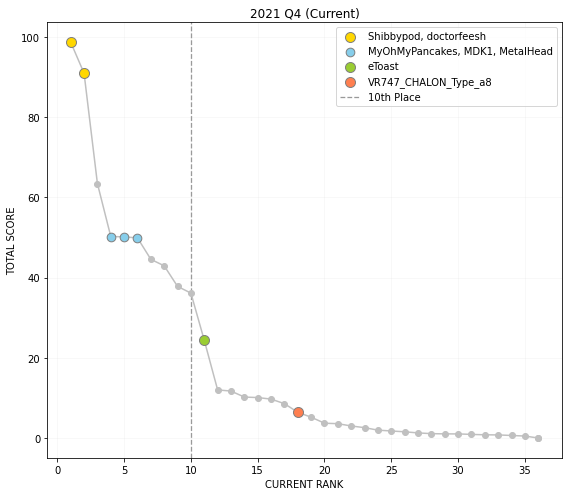

In [10]:
fig, ax = plt.subplots(figsize=(8,7))
ax.plot(
    R['CURRENT RANK'],
    R['TOTAL SCORE'],
    c = 'silver',
    zorder = 1
)
ax.scatter(
    R['CURRENT RANK'],
    R['TOTAL SCORE'],
    c = 'silver',
    zorder = 2
)
ax.scatter(
    R.loc[['Shibbypod','doctorfeesh']]['CURRENT RANK'],
    R.loc[['Shibbypod','doctorfeesh']]['TOTAL SCORE'],
    c = 'gold',
    zorder = 3,
    s = 100,
    edgecolors='tab:grey',
    label = 'Shibbypod, doctorfeesh'
)
ax.scatter(
    R.loc[['MyOhMyPancakes','MDK1','MetalHead']]['CURRENT RANK'],
    R.loc[['MyOhMyPancakes','MDK1','MetalHead']]['TOTAL SCORE'],
    c = 'skyblue',
    edgecolors='tab:grey',
    zorder = 3,
    s = 75,
    label = 'MyOhMyPancakes, MDK1, MetalHead'
)
ax.scatter(
    R.loc['eToast']['CURRENT RANK'],
    R.loc['eToast']['TOTAL SCORE'],
    c = 'yellowgreen',
    edgecolors='tab:grey',
    zorder = 3,
    s = 100,
    label = 'eToast'
)
ax.scatter(
    R.loc['VR747_CHALON_Type_a8']['CURRENT RANK'],
    R.loc['VR747_CHALON_Type_a8']['TOTAL SCORE'],
    c = 'coral',
    edgecolors='tab:grey',
    zorder = 3,
    s = 100,
    label = 'VR747_CHALON_Type_a8'
)
ax.axvline(10,ls='--',lw=1.3,c='k',zorder=0,alpha=0.4,label='10th Place')
ax.set_xlabel('CURRENT RANK')
ax.set_ylabel('TOTAL SCORE')
ax.grid(zorder=0,alpha=0.1)
ax.set_title('2021 Q4 (Current)')
ax.legend()
plt.tight_layout()

Now look at the same plot but with all-time rankings that include inactive players.  Sure seems like that steep climb starting around 12 points (20th place) is a killer.  Just playing around at this point but the data from a scoring system like this could be really fun to explore.

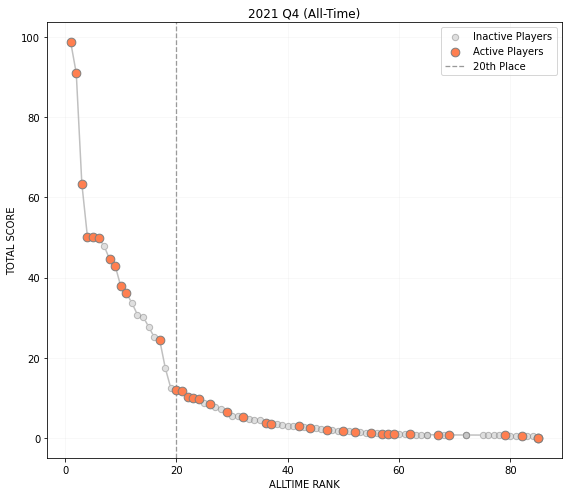

In [11]:
A = R[~np.isnan(R['CURRENT RANK'])].copy()
R2 = R.sort_values(by='ALLTIME RANK').copy()

fig, ax = plt.subplots(figsize=(8,7))
ax.plot(
    R2['ALLTIME RANK'],
    R2['TOTAL SCORE'],
    c = 'silver',
    zorder = 1
)
ax.scatter(
    R2['ALLTIME RANK'],
    R2['TOTAL SCORE'],
    c = 'white',
    edgecolors='white',
    s=40,
    zorder = 1
)
ax.scatter(
    R2['ALLTIME RANK'],
    R2['TOTAL SCORE'],
    c = 'silver',
    edgecolors='tab:grey',
    alpha = 0.5,
    s=40,
    zorder = 2,
    marker = 'o',
    label = 'Inactive Players'
)

ax.scatter(
    A['ALLTIME RANK'],
    A['TOTAL SCORE'],
    c = 'coral',
    s = 75,
    edgecolors='tab:grey',
    zorder = 2,
    marker = 'o',
    label = 'Active Players'
)

ax.axvline(20,ls='--',lw=1.3,c='k',zorder=0,alpha=0.4,label='20th Place')
ax.set_xlabel('ALLTIME RANK')
ax.set_ylabel('TOTAL SCORE')
ax.grid(zorder=0,alpha=0.1)
ax.set_title('2021 Q4 (All-Time)')
ax.legend()
plt.tight_layout()

# Awards

Another use for this data is generating awards or showcasing runs from the past quarter. For example, comparing Q4 with rankings generated for Q3 allows us to find the most improved player and the best new player over the quarter.  The top player is simply the highest score... a formality given the rankings (but you can't have awards without an MVP).

In [12]:
AWARDS = awards.awards(
    DATE = '2021-12-31',
    REGION = 'NTSC'
)
AWARDS

,PLAYER,TOTAL SCORE,dSCORE
AWARD,,,
Best Player,Shibbypod,98.67,2.68
Most Improved,MDK1,50.15,23.06
Top Rookie,touhu_dnb,0.90,NaN


# Achievements

You can also highlight achievements such as new players or players with a complete scoresheet.  This is currently in progress but hopefully it illustrates the potential.

In [13]:
ACHIEVEMENTS = awards.achievements(
    DATE = '2021-12-31',
    REGION = 'NTSC'
)

In [14]:
ACHIEVEMENTS['First Submission']

""
FIRST SUBMISSION ACHIEVEMENT
GetLow
Sysynct
backpain4
irukan
touhu_dnb


In [15]:
ACHIEVEMENTS['Complete Sheet']

""
COMPLETE SHEET ACHIEVEMENT
MetalHead
MyOhMyPancakes
Shibbypod
andypanther
doctorfeesh


In [16]:
ACHIEVEMENTS['All Standards']

""
ALL STANDARDS ACHIEVEMENT
Game
Shibbypod
doctorfeesh


In [17]:
ACHIEVEMENTS['All Benchmarks']

""
ALL BENCHMARKS ACHIEVEMENT
Shibbypod
doctorfeesh


In [18]:
ACHIEVEMENTS['All Medals']

""
ALL MEDALS ACHIEVEMENT
Shibbypod


# Showcase

Finally, we could even build an algorithm to showcase the best runs of the quarter.  Here's a quick test where the highest placing runs submitted in Q4 were selected for each category. Ties were decided by some janky comparison between the median time and the world record time.  Now I know why MDK1 got the Most Improved award! Another idea could be to find the player with the greatest improvement for each course over the quarter.  This has the opportunity to recognize the work of newer players, like someone who went from a 1'09"xxx on Sunny Beach [3 Lap] in Q3 to 1'05"xxx in Q4. It's also fun because you can link the videos for those who missed seeing the run come through in the first place.

In [19]:
BESTRUNS = awards.best_runs(
    DATE = '2021-12-31',
    REGION = 'NTSC'
)
BESTRUNS

,PLAYER,LEVEL,PLACE,TIME,VIDEO
BEST RUNS,,,,,
3 Lap,MDK1,Sunny Beach,2,"1'03""273",https://youtu.be/r54GyglE5nc
1 Lap,MDK1,Sunny Beach,3,"0'20""182",https://youtu.be/7IXcMzO3sWY
Reverse,MDK1,Sunset Bay,1,"1'07""976",https://youtu.be/FpOKDjDX_-8
RTA,MDK1,Championship Normal,3,"9'24""000",https://youtu.be/7u37I2mJWGw
